In [2]:
import pandas as pd
data  = pd.read_csv('C:\\Users\\makka\\Downloads\\gamesc2b2088.csv')

In [3]:
data.head()

,title,platform,score,genre,editors_choice
0,LittleBigPlanet PS Vita,PlayStation Vita,9.0,Platformer,Y
1,LittleBigPlanet PS Vita -- Marvel Super Hero E...,PlayStation Vita,9.0,Platformer,Y
2,Splice: Tree of Life,iPad,8.5,Puzzle,N
3,NHL 13,Xbox 360,8.5,Sports,N
4,NHL 13,PlayStation 3,8.5,Sports,N


In [4]:
data.groupby('platform').size()

platform
Android              1
Macintosh            5
Nintendo 3DS         1
Nintendo DS          2
PC                  24
PlayStation 3       23
PlayStation Vita     5
Xbox 360            23
iPad                 3
iPhone              12
dtype: int64

In [5]:
data.genre.value_counts()

Shooter              14
RPG                  14
Adventure            12
Sports               11
Fighting             10
Action               10
Action, Adventure     6
Strategy              6
Action, RPG           4
Platformer            3
Puzzle                3
Music                 1
Racing, Action        1
Racing                1
Board                 1
Strategy, RPG         1
Name: genre, dtype: int64

In [6]:
data.groupby('genre').score.agg(['min', 'max'])

,min,max
genre,,
Action,5.5,9.3
"Action, Adventure",5.5,9.0
"Action, RPG",6.5,9.0
Adventure,2.5,9.0
Board,9.0,9.0
Fighting,3.0,8.8
Music,8.5,8.5
Platformer,4.9,9.0
Puzzle,8.5,9.0


In [7]:
data.groupby(['genre', 'editors_choice']).score.mean()

genre              editors_choice
Action             N                 6.985714
                   Y                 9.100000
Action, Adventure  N                 7.100000
                   Y                 9.000000
Action, RPG        N                 6.850000
                   Y                 9.000000
Adventure          N                 6.214286
                   Y                 8.940000
Board              Y                 9.000000
Fighting           N                 6.900000
Music              Y                 8.500000
Platformer         N                 4.900000
                   Y                 9.000000
Puzzle             N                 8.500000
                   Y                 9.000000
RPG                N                 7.287500
                   Y                 9.316667
Racing             Y                 9.000000
Racing, Action     N                 7.100000
Shooter            N                 6.892857
Sports             N                 6.500000


In [8]:
import matplotlib.pyplot as plt
df = pd.DataFrame(data)


In [9]:
edit_choice = df.groupby('editors_choice').size()
edit_choice.head()

editors_choice
N    67
Y    32
dtype: int64

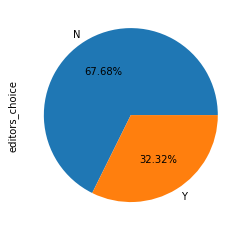

In [10]:
edit_choice.plot.pie(label='editors_choice',autopct = '%.2f%%')

In [13]:
df.head()

,title,platform,score,genre,editors_choice
0,LittleBigPlanet PS Vita,PlayStation Vita,9.0,Platformer,Y
1,LittleBigPlanet PS Vita -- Marvel Super Hero E...,PlayStation Vita,9.0,Platformer,Y
2,Splice: Tree of Life,iPad,8.5,Puzzle,N
3,NHL 13,Xbox 360,8.5,Sports,N
4,NHL 13,PlayStation 3,8.5,Sports,N


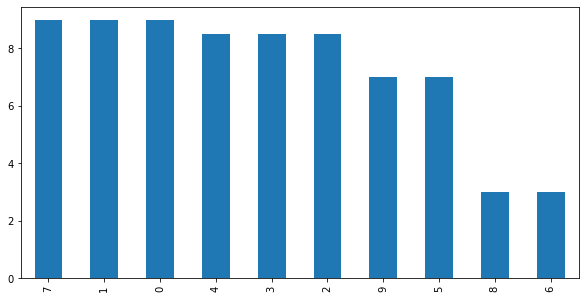

In [19]:
df['score'].head(10).sort_values(ascending=False).plot(kind='bar',figsize=(10,5))


In [24]:
#games with low rating
import numpy as np
df_low = df.groupby('genre').agg([np.mean, np.size])
df_low

score      
                       mean  size
genre                            
Action             7.620000  10.0
Action, Adventure  8.050000   6.0
Action, RPG        7.925000   4.0
Adventure          7.350000  12.0
Board              9.000000   1.0
Fighting           6.900000  10.0
Music              8.500000   1.0
Platformer         7.633333   3.0
Puzzle             8.833333   3.0
RPG                8.157143  14.0
Racing             9.000000   1.0
Racing, Action     7.100000   1.0
Shooter            6.892857  14.0
Sports             7.663636  11.0
Strategy           8.083333   6.0
Strategy, RPG      3.900000   1.0

In [32]:
#games with low rating
low_rated_games_filter = df_low['score']['mean'] < 6
low_rated_games_filter

genre
Action               False
Action, Adventure    False
Action, RPG          False
Adventure            False
Board                False
Fighting             False
Music                False
Platformer           False
Puzzle               False
RPG                  False
Racing               False
Racing, Action       False
Shooter              False
Sports               False
Strategy             False
Strategy, RPG         True
Name: mean, dtype: bool

## from tthis we can say Strategy, RPG    is having Low Game Rating

In [44]:
#api as dictionary
df.to_json()

'{"title":{"0":"LittleBigPlanet PS Vita","1":"LittleBigPlanet PS Vita -- Marvel Super Hero Edition","2":"Splice: Tree of Life","3":"NHL 13","4":"NHL 13","5":"Total War Battles: Shogun","6":"Double Dragon: Neon","7":"Guild Wars 2","8":"Double Dragon: Neon","9":"Total War Battles: Shogun","10":"Tekken Tag Tournament 2","11":"Tekken Tag Tournament 2","12":"Wild Blood","13":"Mark of the Ninja","14":"Mark of the Ninja","15":"Home: A Unique Horror Adventure","16":"Home: A Unique Horror Adventure","17":"Avengers Initiative","18":"Way of the Samurai 4","19":"JoJo\'s Bizarre Adventure HD","20":"JoJo\'s Bizarre Adventure HD","21":"Mass Effect 3: Leviathan","22":"Mass Effect 3: Leviathan","23":"Mass Effect 3: Leviathan","24":"Dark Souls (Prepare to Die Edition)","25":"Symphony","26":"Bastion","27":"Tom Clancy\'s Ghost Recon Phantoms","28":"Thirty Flights of Loving","29":"Legasista","30":"The Walking Dead: The Game -- Episode 3: Long Road Ahead","31":"World of Warcraft: Mists of Pandaria","32":"He